# ABOUT THE NOTEBOOK

The objective of this Notebook is to build a classification model that classifies the side effect of a drug, 
according to their age and various other features like gender, race of different patients.

#### Importing Dependancies and Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

#### Loading the Drug side effect Dataset

In [2]:
df = pd.read_csv('DRUG classification.csv')

In [3]:
df.head()

,Age,Condition,Drug,EaseofUse,Satisfaction,Gender,Side effect,Race
0,41,Stuffy Nose,25dph-7.5peh,5,5,M,Constipation,asian
1,49,Cold Symptoms,25dph-7.5peh,5,5,M,Dermatitis,asian
2,37,Other,warfarin (bulk) 100 % powder,2,3,M,Diarrhea,african american
3,33,Other,warfarin (bulk) 100 % powder,2,1,M,Dizziness,american indian
4,27,Other,warfarin (bulk) 100 % powder,1,1,M,Drowsiness,native hawaiian


In [22]:
df.tail()

,Age,Condition,Drug,EaseofUse,Satisfaction,Gender,Side effect,Race
399995,47,Bronchitis caused by the Bacteria Streptococcu...,levofloxacin solution,2,2,M,Dizziness,white
399996,28,Acute Inflammation of the Maxillary Sinus,levofloxacin,3,1,M,Insomnia,white
399997,28,Other,levitra,5,5,M,Constipation,white
399998,28,Bacterial Infection with Bronchitis,levaquin,1,1,M,Dermatitis,asian
399999,49,Staphylococcus Saprophyticus Infection of Urin...,levofloxacin solution,5,1,M,Dermatitis,asian


### Understanding the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Age           400000 non-null  int64 
 1   Condition     400000 non-null  object
 2   Drug          400000 non-null  object
 3   EaseofUse     400000 non-null  int64 
 4   Satisfaction  400000 non-null  int64 
 5   Gender        400000 non-null  object
 6   Side effect   400000 non-null  object
 7   Race          400000 non-null  object
dtypes: int64(3), object(5)
memory usage: 24.4+ MB


In [5]:
df.shape

(400000, 8)

In [6]:
df.isnull().sum()

Age             0
Condition       0
Drug            0
EaseofUse       0
Satisfaction    0
Gender          0
Side effect     0
Race            0
dtype: int64

In [7]:
df.head()

,Age,Condition,Drug,EaseofUse,Satisfaction,Gender,Side effect,Race
0,41,Stuffy Nose,25dph-7.5peh,5,5,M,Constipation,asian
1,49,Cold Symptoms,25dph-7.5peh,5,5,M,Dermatitis,asian
2,37,Other,warfarin (bulk) 100 % powder,2,3,M,Diarrhea,african american
3,33,Other,warfarin (bulk) 100 % powder,2,1,M,Dizziness,american indian
4,27,Other,warfarin (bulk) 100 % powder,1,1,M,Drowsiness,native hawaiian


### About the dataset

In [8]:
def data_info(df):
    print('Number of Columns in the dataset: ',df.shape[1])
    print('Number of rows in the dataset: ',df.shape[0])
    print('Total number of datapoints in the dataset:',df.size)
    numerical_features = [f for f in df.columns if df[f].dtypes!='O']
    print('Count of Numerical Features:',len(numerical_features))
    cat_features = [c for c in df.columns if df[c].dtypes=='O']
    print('Count of Categorical Features:',len(cat_features))
data_info(df)

Number of Columns in the dataset:  8
Number of rows in the dataset:  400000
Total number of datapoints in the dataset: 3200000
Count of Numerical Features: 3
Count of Categorical Features: 5


## Data Preprocessing

### Statistical details

In [9]:
df.describe()

,Age,EaseofUse,Satisfaction
count,400000.000000,400000.000000,400000.000000
mean,37.262695,4.019930,3.124143
std,9.735549,1.317273,1.611066
min,18.000000,1.000000,1.000000
25%,30.000000,3.000000,1.000000
50%,36.000000,5.000000,3.000000
75%,43.000000,5.000000,5.000000
max,82.000000,10.000000,10.000000


In [10]:
df.nunique()

Age               65
Condition       1806
Drug            7093
EaseofUse          7
Satisfaction       7
Gender             2
Side effect        8
Race               5
dtype: int64

In [11]:
group_names = df['Side effect'].unique().tolist()
group_names

['Constipation',
 ' Dermatitis',
 'Diarrhea',
 'Dizziness',
 'Drowsiness',
 'Dry mouth',
 'Headache',
 'Insomnia']

In [12]:
df.dtypes

Age              int64
Condition       object
Drug            object
EaseofUse        int64
Satisfaction     int64
Gender          object
Side effect     object
Race            object
dtype: object

In [13]:
def unique_checker(df):
    """loops and prints unique values in each column"""
    for col in df.columns:
        print("Unique values in {} feature.".format(col))
        print(df[col].unique(),"\n")
        print("*"*40)

In [14]:
unique_checker(df) #scroll / toggle output to view all outputs

# Note:
## this step is just for the Data Understanding part
### Not intergral to the straightforward analysis 

Unique values in Age feature.
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82] 

****************************************
Unique values in Condition feature.
['Stuffy Nose' 'Cold Symptoms' 'Other' ...
 'Combative and Explosive Behavior' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance'] 

****************************************
Unique values in Drug feature.
['25dph-7.5peh' 'warfarin (bulk) 100 % powder' 'wymzya fe' ...
 'chest congestion relief dm' 'chantix' 'chateal'] 

****************************************
Unique values in EaseofUse feature.
[ 5  2  1  4  3  6 10] 

****************************************
Unique values in Satisfaction feature.
[ 5  3  1  4  2  6 10] 

****************************************
Unique values in Gender feature.
['M' 'F'] 

****************************************
Unique values in Side eff

In [15]:
def count_checker(df):
    """count of each value under each feature in the data"""
    for col in df.columns:
        print("Count for each category of values in {} feature.".format(col))
        print(df[col].value_counts(),"\n")
        print("*"*40)

In [16]:
count_checker(df) #scroll / toggle output to view all outputs
# Note:
## this step is just for the Data Understanding part
### Not intergral to the straightforward analysis 

Count for each category of values in Age feature.
35    20690
34    20390
36    18364
31    18318
29    18035
      ...  
64      168
63      168
62      168
61      168
82       84
Name: Age, Length: 65, dtype: int64 

****************************************
Count for each category of values in Condition feature.
Other                                                    53739
High Blood Pressure                                      32661
Pain                                                     25337
Depression                                               16429
Birth Control                                            13183
                                                         ...  
Severe Diarrhea                                              1
Surgical Vitrectomy Adjunct to Enhance Visualization         1
Varying Shades of Excessive Coloration of a Body Part        1
Pneumonia caused by a Fungus                                 1
Prevention of Newborn Respiratory Distress Syndrome  

### Findings

The dataset contains 400000 entries with a total of 8 columns representing different attributes of the people. Here’s the list;
* Age: Discrete 
* Sex: Nominal (2 categories)
* Race: Nominal (5 categories)
* Side effect: Nominal (8 categories)
* Condition: Patients medical condtition(Categorical feature)
* EaseofUse: It describe how easily a patient can use a medicine (Discrete)
* Satisfaction : Patients satisfaction to a drug (Discrete)
* Drug : Drug name (Categorical feature)

In [20]:
#creating a Dataframe from the given dataset
dc = pd.DataFrame(df)
dc.columns

Index(['Age', 'Condition', 'Drug', 'EaseofUse', 'Satisfaction', 'Gender',
       'Side effect', 'Race'],
      dtype='object')

## Data Cleaning

### 1. Missing Value

In [21]:
 #check the missing value
dc.isnull().sum()

Age             0
Condition       0
Drug            0
EaseofUse       0
Satisfaction    0
Gender          0
Side effect     0
Race            0
dtype: int64

**Above sum shows there are no null values in the dataset.**

### 2. Remove duplicate data

In [23]:
#Checking for duplicated entries
sum(dc.duplicated(dc.columns))

13941

In [24]:
#Delete the duplicates and check that it worked
dc = dc.drop_duplicates(dc.columns, keep='last')
sum(dc.duplicated(dc.columns))

0

In [25]:
dc.shape

(386059, 8)

In [26]:
dc.columns

Index(['Age', 'Condition', 'Drug', 'EaseofUse', 'Satisfaction', 'Gender',
       'Side effect', 'Race'],
      dtype='object')

### 3. Handling Outliers

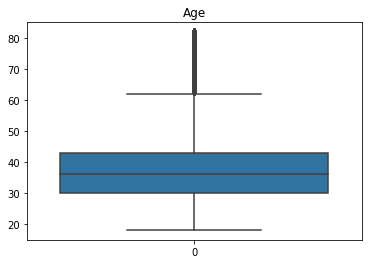

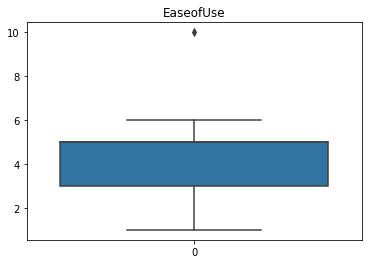

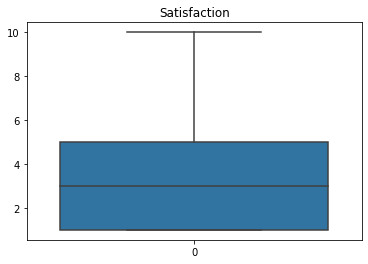

In [27]:
## checking outliers
for i in ['Age', 'EaseofUse',
       'Satisfaction'] :
    plt.title(i)
    sns.boxplot(data=dc[i])
    plt.show()  

In [28]:
df1=dc
df1.head()

,Age,Condition,Drug,EaseofUse,Satisfaction,Gender,Side effect,Race
0,41,Stuffy Nose,25dph-7.5peh,5,5,M,Constipation,asian
1,49,Cold Symptoms,25dph-7.5peh,5,5,M,Dermatitis,asian
2,37,Other,warfarin (bulk) 100 % powder,2,3,M,Diarrhea,african american
3,33,Other,warfarin (bulk) 100 % powder,2,1,M,Dizziness,american indian
4,27,Other,warfarin (bulk) 100 % powder,1,1,M,Drowsiness,native hawaiian


### Handling Outliers with Age

In [29]:
q1 = np.percentile(df1['Age'],25,interpolation='midpoint')
q3 = np.percentile(df1['Age'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df1['Age'][(df1['Age']<low_limit)|(df1['Age']>high_limit)].index
df1.drop(index,inplace=True)

### Handling Outliers with EaseofUse

In [30]:
q1 = np.percentile(df1['EaseofUse'],25,interpolation='midpoint')
q3 = np.percentile(df1['EaseofUse'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df1['EaseofUse'][(df1['EaseofUse']<low_limit)|(df1['EaseofUse']>high_limit)].index
df1.drop(index,inplace=True)

### Handling Outliers with Satisfaction

In [31]:
q1 = np.percentile(df1['Satisfaction'],25,interpolation='midpoint')
q3 = np.percentile(df1['Satisfaction'],75,interpolation='midpoint')

IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR

index=df1['Satisfaction'][(df1['Satisfaction']<low_limit)|(df1['Satisfaction']>high_limit)].index
df1.drop(index,inplace=True)

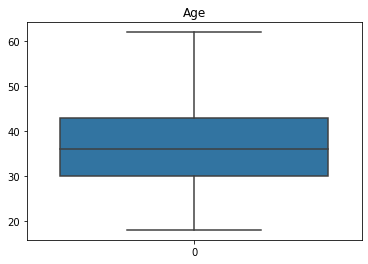

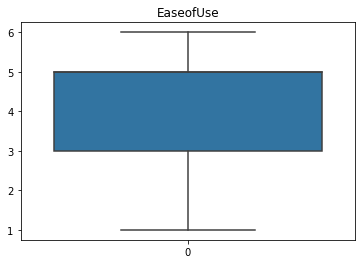

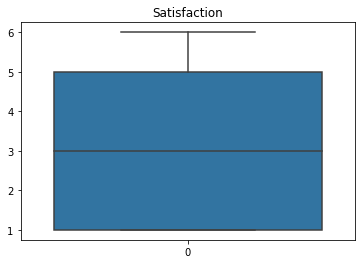

In [32]:
## checking outliers
for i in ['Age', 'EaseofUse',
       'Satisfaction'] :
    plt.title(i)
    sns.boxplot(data=df1[i])
    plt.show() 